In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

In [10]:
## Logistic regression algorithm
class MyLogisticRegression:
    def  __init__(self, iterations, lr_a, lr_b):
        self.iterations = iterations
        self.lr_a = lr_a
        self.lr_b = lr_b
        self.a = np.array([0,0])
        self.b = 0
    
    def sigmoid(self, value):
        sigmoid_value = 1 / (1 + np.exp(-value))
        return sigmoid_value
    
    def fit(self, x_train, y_train):
        for i in range(self.iterations):
            f = self.sigmoid(x_train.dot(self.a) + self.b)
            da = np.dot(x_train.T, (f - y_train)) / x_train.shape[0]
            db = (f - y_train).mean()
            self.a = self.a - self.lr_a * da
            self.b = self.b - self.lr_b * db
        return
    
    def predict(self, x_set):
        prediction = np.zeros(x_set.shape[0])
        f = self.sigmoid(x_set.dot(self.a) + self.b)
        
        for i in range(x_set.shape[0]):
            if f[i] >= 0.5:
                prediction[i] = 1
        return prediction

In [11]:
np.random.seed(np.random.randint(0, 1_000_000))

num_points = np.random.randint(0, 1_000)

mean_1 = (np.random.rand(1,2)[0]) * 10
cov_1 = (np.random.rand(2,2)) * 10
x_set_1 = np.random.multivariate_normal(mean_1, cov_1, num_points)

mean_2 = (np.random.rand(1,2)[0]) * 10
cov_2 = (np.random.rand(2,2)) * 10
x_set_2 = np.random.multivariate_normal(mean_2, cov_2, num_points)

c:\users\alexe\pycharmprojects\data-analysis\venv\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  import sys
c:\users\alexe\pycharmprojects\data-analysis\venv\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: covariance is not positive-semidefinite.
  # This is added back by InteractiveShellApp.init_path()


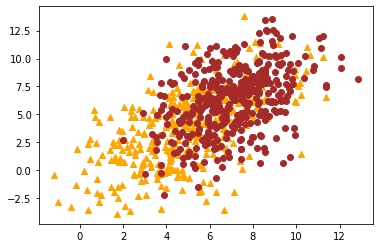

In [12]:
plt.scatter(x_set_1[:, 0], x_set_1[:, 1], marker = '^', color='orange')
plt.scatter(x_set_2[:, 0], x_set_2[:, 1], marker = 'o', color='brown')

In [13]:
x = np.concatenate([x_set_1, x_set_2])
y = np.hstack((np.array([0] * num_points), np.array([1] * num_points)))
    

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
myLogReg = MyLogisticRegression(iterations=1_000, lr_a=0.01, lr_b=0.1)
myLogReg.fit(x_train, y_train)
y_pred =  myLogReg.predict(x_test)

              precision    recall  f1-score   support

           0       0.75      0.72      0.73       100
           1       0.70      0.73      0.71        88

    accuracy                           0.72       188
   macro avg       0.72      0.72      0.72       188
weighted avg       0.72      0.72      0.72       188



<AxesSubplot:>

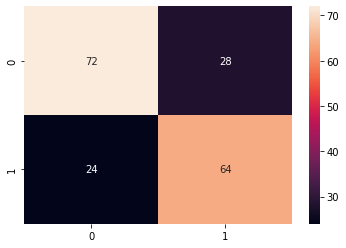

In [15]:
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

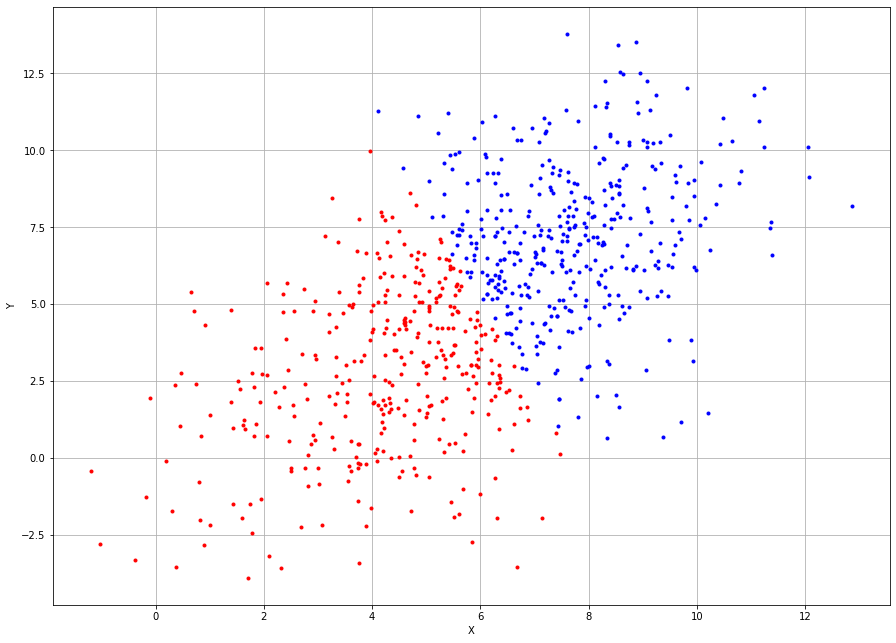

In [16]:
myLogReg = MyLogisticRegression(iterations=1000, lr_a=0.01, lr_b=0.1)
myLogReg.fit(x, y)
y_pred =  myLogReg.predict(x)
plt.figure(figsize=(15,11))
plt.plot(x[:,0][y_pred == 0], x[:,1][y_pred == 0], 'r.')
plt.plot(x[:,0][y_pred == 1], x[:,1][y_pred == 1], 'b.')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()